# Comparison of methods for numerical integration of given functions
From __A Guide to Monte Carlo Simulations in Statistical Physics__, Landau & Binder. Chapter 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (9, 6)

## Simple methods: _hit-or-miss_

\begin{equation}\label{eq:}
    y = \int_a^b f(x)dx
\end{equation}


**+Insert figure and explain briefly+**

The *Hit-or-Miss* method is a straightforward solution to this problem because using random numbers, we can drop $N$ points in the box and count the number, $K$, which fall below $f(X)$ for each value of $x$.

An estimate for the integral is then given by the fraction of points which fall bellow the curve times the area of the box.

 \begin{equation}\label{2}
    y_{est}=\left(\frac{K}{N}\right) [\Delta y(b-a)]
\end{equation}

This value converges to the real value of $y$ as $N\to \infty$. 

### Example: Estimating the value of $\pi$

In order to estimate $\pi$, the area of the circle is needed, $A=\pi r^2$, and setting the radius $r=1$

\begin{equation}\label{A}
    A=\pi=\int_{0}^1f(r)dr=2\int_{-1}^1f(x)dx=4\int_{0}^1f(x)dx
\end{equation}

for $f(x)=\sqrt{1-x^2}$ the parametric equation for the circle.




- #### Define the curve f(x) to apply "__hit-or-miss__".

Consider the parametric equation for the circle of radius $r=1$.

\begin{equation}\label{eq:3}
    x^2+y^2=1
\end{equation}

Solving y=f(x) in \eqref(eq:3), we obtain the following

\begin{align*}
    y^2=1-x^2\quad \Rightarrow  y=\pm\sqrt{1-x^2}
\end{align*}

Therefore 

\begin{equation}\label{eq:4}
    f(x)=\sqrt{1-x^2}
\end{equation}





In [3]:
f = lambda x: np.sqrt(1-x**2)

To complete the estimation for $\pi$ following the equation \eqref{2} is

\begin{align*}
\pi_{est} = 4\left(\frac{K}{N}\right)
\end{align*}

- #### Generate N points between $a$ to $b$ ($x$-__axis__), and $y_0=0$ to $y_1$  (y-__axis__).

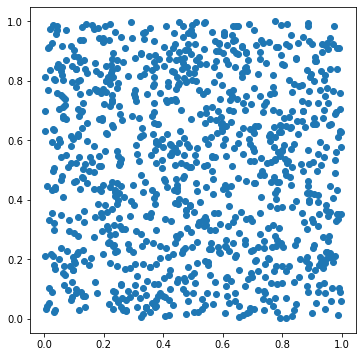

In [4]:
def number_generator(N, x_lims, y_lims):
    xx = np.random.uniform(x_lims[0], x_lims[1], size=N)
    yy = np.random.uniform(y_lims[0], y_lims[1], size=N)
    return np.array([xx,yy])

N = 1000; x_lims = [0,1]; y_lims = [0,1]; 

P = number_generator(N, x_lims, y_lims); 

plt.scatter(P[0], P[1])
plt.axis('scaled'); plt.show()

- #### Evaluate which points $p=(x,y)$ satisfy the condition $y<f(x)$ for $x$.

In [5]:
def under_curve(P, f, tol = 1e-9):
    N = len(P[0]); hits = np.ones(N, dtype="int")
    for i in range(N):
        if P[1,i]-f(P[0,i]) > tol :     # y-f(x)< epsilon
            hits[i]*=-1
        else: pass
    return hits.astype(int)

hits = under_curve(P, f)

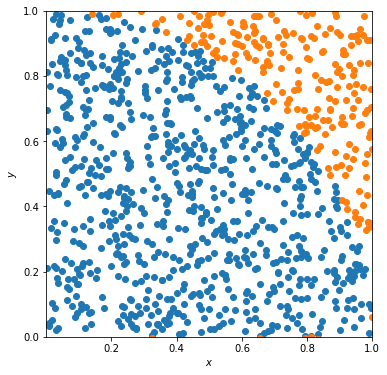

In [6]:
plt.scatter(P[0], P[1]*hits);
plt.scatter(P[0], -P[1]*hits);

plt.axis('scaled')
plt.xlabel(r"$x$"); plt.ylabel(r"$y$")
plt.xlim(1e-6,1); plt.ylim(0,1); plt.show()

- #### Estimate the value of $y_{est}$ for $N$ random points.

In [7]:
def estimate_int(hits, N, x_lims, y_lims):
    K = np.count_nonzero(hits == 1)
    int_est = (K/N)*(y_lims[1]-y_lims[0])*(x_lims[1]-x_lims[0])
    return int_est

estimate_int(hits, N, x_lims, y_lims)

0.785

- #### Concatenate all previous functions to make a complete model

In [8]:
def hit_or_miss(N, x_lims, y_lims, f):
    P = number_generator(N, x_lims, y_lims)
    hits = under_curve(P, f)
    pi_est = 4*estimate_int(hits, N, x_lims, y_lims)
    return P, hits, pi_est

In [9]:
# %timeit hit_or_miss(100000, [0, 1], [0, 1], f)    #timing the whole process

In [10]:
N = 100000; x_lims = [0,1]; y_lims = [0,1]; 
f = lambda x: np.sqrt(1-x**2)

P, hits, pi_est = hit_or_miss(N, x_lims, y_lims, f)

- #### Plot $f(x)$ and the points under the curve.

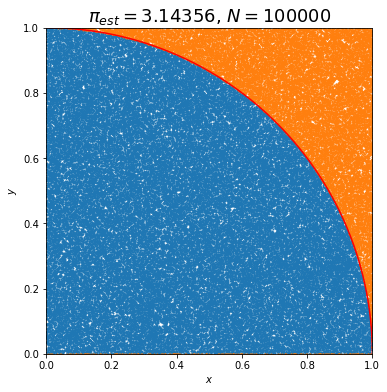

In [11]:
X = np.linspace(0,1,10000); Y = f(X)

# xx, yy = np.meshgrid(x, y)

plt.plot(X,Y, "red")
plt.scatter(P[0], P[1]*hits, s=1);
plt.scatter(P[0],-P[1]*hits, s=1);

label = r"$\pi_{est}=$" + str(pi_est) + r", $N=$" + str(N)
plt.axis('scaled'); plt.xlim(0,1); plt.ylim(0,1); 
plt.title(label, fontsize=18)
plt.xlabel(r"$x$"); plt.ylabel(r"$y$")
plt.show()


- #### Estimates of $\pi$ for different values of $N$.

In [12]:
N = np.array([int(2**(i)) for i in range(2,21)], dtype="int")
x_lims = [0,1]; y_lims = [0,1]; f = lambda x: np.sqrt(1-x**2)
pi = []

for i in range(len(N)):    
    _, _, pi_est = hit_or_miss(N[i], x_lims, y_lims, f)
    pi.append(pi_est)
pi = np.array(pi)

In [13]:
pd.DataFrame(data=np.array([N, pi]).T, columns=["$N$", "$\pi$"])

,$N$,$\pi$
0,4.0,3.000000
1,8.0,3.500000
2,16.0,3.000000
3,32.0,3.125000
4,64.0,3.312500
5,128.0,3.125000
6,256.0,3.234375
7,512.0,3.101562
8,1024.0,3.148438
9,2048.0,3.099609


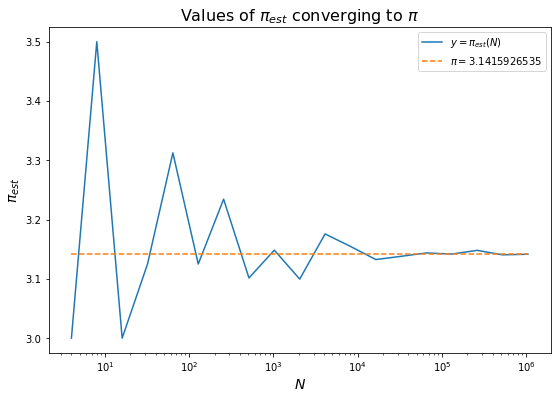

In [14]:
real_pi = 3.1415926535

plt.plot(N, pi, label=r"$y=\pi_{est}(N)$")
plt.plot(N, pi*0+real_pi, "--", label=r"$\pi=3.1415926535$")
plt.xscale("log")

# plt.axis('scaled'); 
plt.xlabel("$N$", fontsize=14); plt.ylabel("$\pi_{est}$", fontsize=14), 
plt.legend()
plt.title("Values of $\pi_{est}$ converging to $\pi$", fontsize=16)
plt.show()

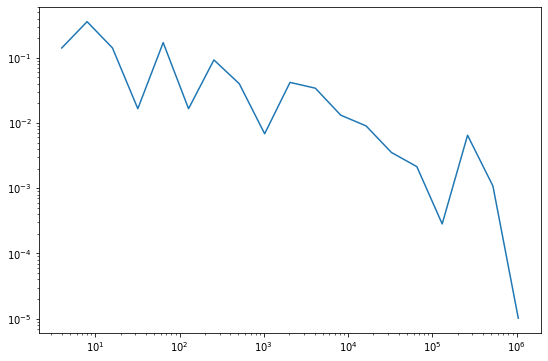

In [15]:
plt.plot(N, np.abs(pi-real_pi), label=r"$y=\pi_{est}(N)$")
plt.xscale("log");
plt.yscale("log")